In [321]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

### Загружаем данные

### Гипотеза:
Клинических записи пациентов, включая возраст, пол, тип боли в груди, артериальное давление, уровень холестерина, и так далее позволят предсказать появление заболеваний сердца.

### Описание гипотезы:
Предполагается, что существует взаимосвязь между клиническими параметрами пациентов и наличием заболеваний сердца. На основе анализа этих параметров и результатов диагностики (в данном случае, указано в HeartDisease), мы можем построить модель машинного обучения, которая сможет предсказывать, будет ли пациент иметь заболевание сердца.

### Пояснение:
Мы предполагаем, что определенные клинические показатели, такие как возраст, пол, артериальное давление, уровень холестерина и результаты тестов ЭКГ, могут быть связаны с наличием или отсутствием заболеваний сердца у пациентов. Построение модели машинного обучения на основе этих данных позволит нам выявить ключевые факторы, влияющие на появление заболеваний сердца, и разработать инструмент для предсказания риска развития заболеваний сердца у пациентов.

### Цель:
Целью данного проекта является построение алгоритма для предсказания заболеваний сердца на основе клинических данных пациентов.

In [355]:
df = pd.read_csv('heart.csv')
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [1: Yes, 0: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [0: upsloping, 1: flat, 2: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]


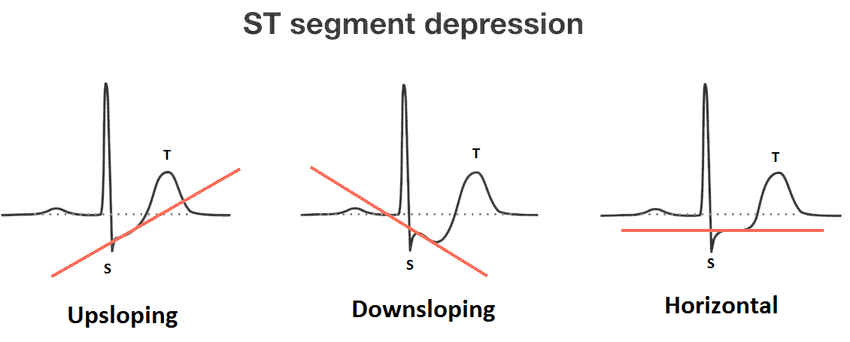

In [325]:
df['Sex'].replace(['M','F'],[0,1],inplace=True)
df['ChestPainType'].replace(['TA','ATA','NAP','ASY'],[0,1,2,3],inplace=True)
df['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2],inplace=True)
df['ExerciseAngina'].replace(['N','Y'],[0,1],inplace=True)
df['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0


<Axes: xlabel='HeartDisease', ylabel='count'>

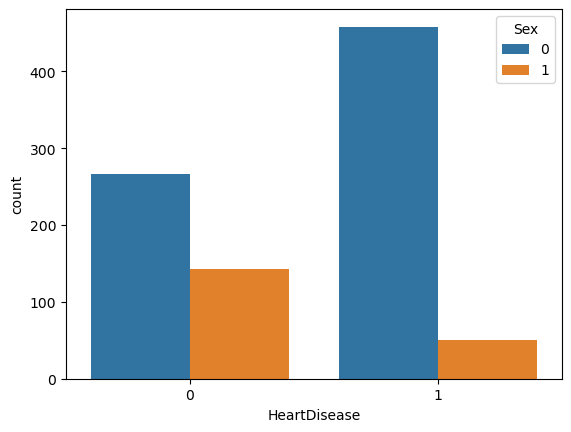

In [326]:
sns.countplot(data=df,x='HeartDisease',hue='Sex')

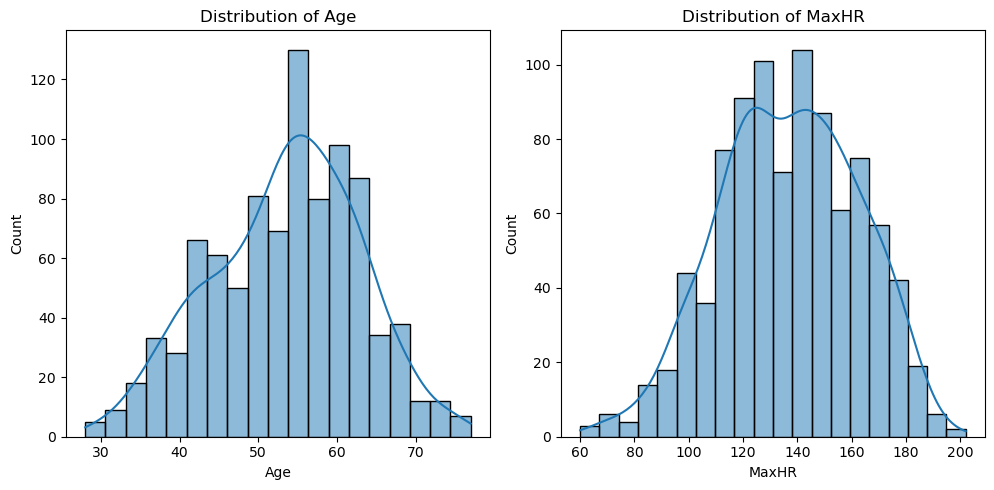

In [327]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['MaxHR'], kde=True)
plt.title('Distribution of MaxHR')

plt.tight_layout()
plt.show()

In [329]:
#sns.pairplot(data=df)

C:\Users\inexy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


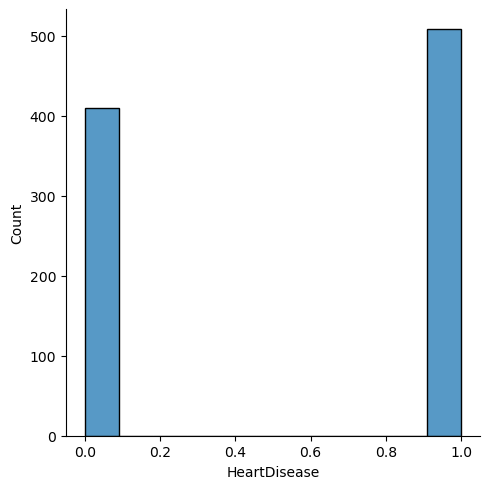

In [330]:
sns.displot(df['HeartDisease'])

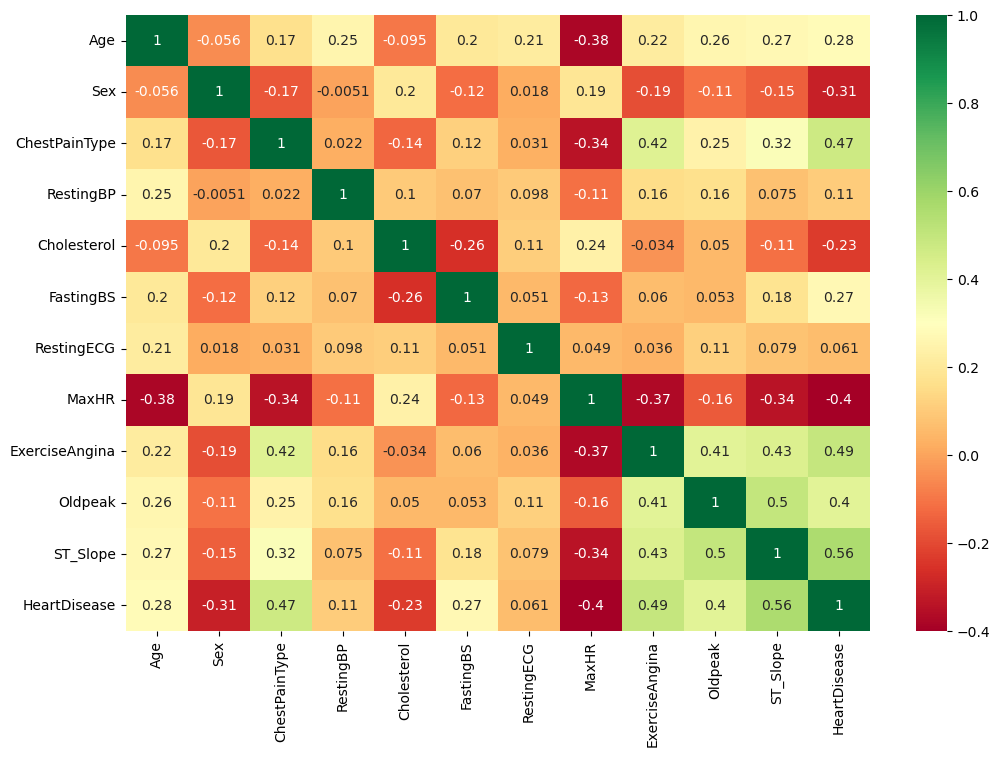

In [331]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap='RdYlGn');

In [332]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [333]:
x = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

In [334]:
y =  df[['HeartDisease']]

In [336]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0
5,39,0,2,120,339,0,0,170,0,0.0,0,0
6,45,1,1,130,237,0,0,170,0,0.0,0,0
7,54,0,1,110,208,0,0,142,0,0.0,0,0
8,37,0,3,140,207,0,0,130,1,1.5,1,1
9,48,1,1,120,284,0,0,120,0,0.0,0,0


In [337]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [339]:
print(f'Train samples: {len(x_train)}')
print(f'Validation samples: {len(x_test)}')

Train samples: 734
Validation samples: 184


In [340]:
# # FEATURE SCALING
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [341]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [342]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [343]:
df_logreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_logreg

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
179,1,0
180,0,0
181,0,0
182,0,0


In [344]:
model_scores, best_model_info = [], []

In [345]:
accuracy = accuracy_score(y_test, y_pred)
train_score = log_reg.score(x_train, y_train)
report = classification_report(y_test, y_pred)
print(f'Train Accuracy: {train_score:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print('Classification Report for {}:\n{}'.format('Logistic Regression', report))

model_scores.append({
        'model': 'Logistic Regression',
        'train_score': train_score,
        'test_score': accuracy})

Train Accuracy: 0.8433
Test Accuracy: 0.8859
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86        74
           1       0.91      0.90      0.90       110

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



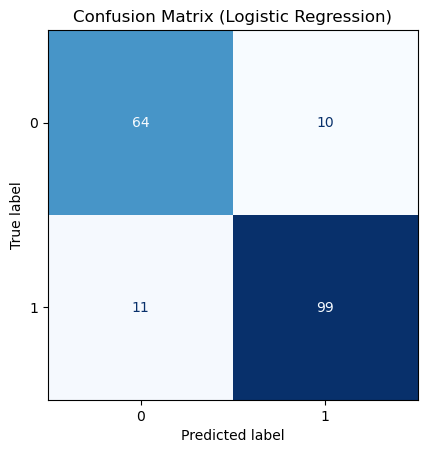

In [346]:
cm = confusion_matrix(y_test, log_reg.predict(x_test), labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(colorbar=False, cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

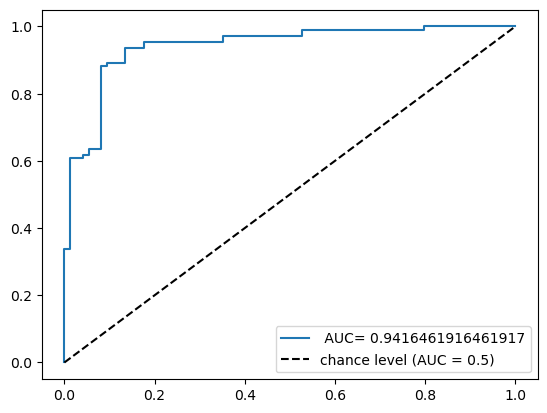

In [347]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label=" AUC= "+str(auc))
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend(loc=4);

In [348]:
RANDOM_STATE = 1
models = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=RANDOM_STATE),
        'params': {'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700],
                   'max_depth': [2, 4, 8, 16, 32, None]
                   }
    },

    'Random Forest': {
        'model': RandomForestClassifier(random_state=RANDOM_STATE),
        'params': {'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700],
                   'max_depth': [2, 4, 8, 16, 32, None],
                   'n_estimators': [50, 100, 150]}
    },

    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 10, 15]}
    },

    'SVM': {
        'model': SVC(random_state=RANDOM_STATE),
        'params': {'kernel': ['linear', 'poly', 'rbf'],
                   'C': [0.1, 0.5, 1, 5, 10]}
    }

}

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        74
           1       0.87      0.93      0.90       110

    accuracy                           0.88       184
   macro avg       0.88      0.86      0.87       184
weighted avg       0.88      0.88      0.87       184



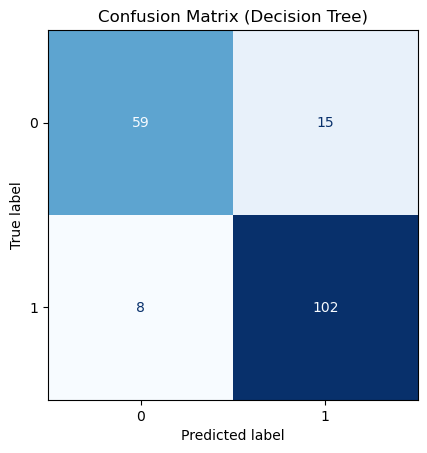

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        74
           1       0.89      0.92      0.91       110

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



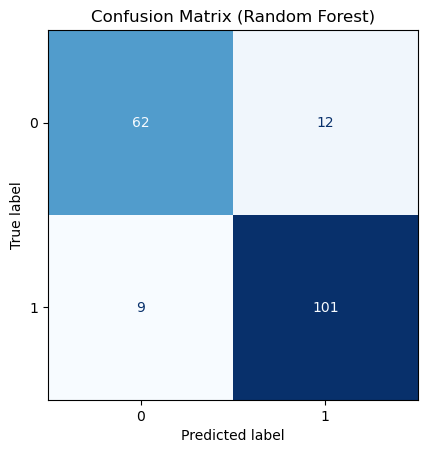

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.60      0.68      0.63        74
           1       0.76      0.69      0.72       110

    accuracy                           0.68       184
   macro avg       0.68      0.68      0.68       184
weighted avg       0.69      0.68      0.69       184



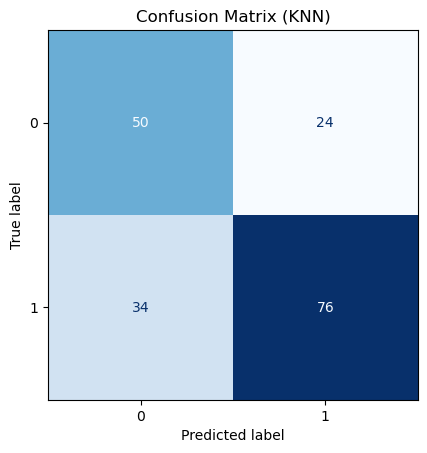

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        74
           1       0.91      0.91      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



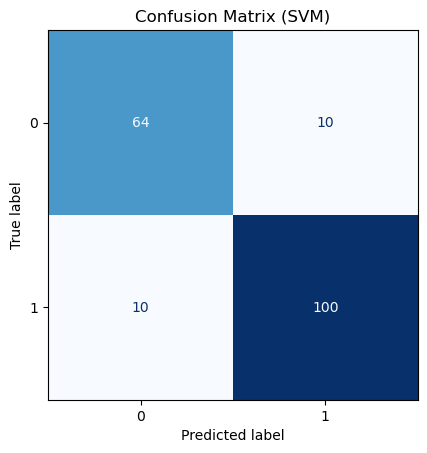

In [349]:
for model_name, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5)
    # clf_r = RandomizedSearchCV(mp['model'], mp['params'], cv=5)

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_score = clf.best_score_
    report = classification_report(y_test, y_pred)
    print('Classification Report for {}:\n{}'.format(model_name, report))

    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(colorbar=False, cmap='Blues')
    plt.title('Confusion Matrix ('+model_name+')')
    plt.show()

    model_scores.append({
        'model': model_name,
        'train_score': train_score,
        'test_score': accuracy,
    })

    best_model_info.append({
        'model': model_name,
        'best_params': clf.best_params_,
        'best_train_score': clf.best_score_,
        'test_score': accuracy,
        'classification_report': report

    })

In [350]:
model_scores

[{'model': 'Logistic Regression',
  'train_score': 0.8433242506811989,
  'test_score': 0.8858695652173914},
 {'model': 'Decision Tree',
  'train_score': 0.8378529493989376,
  'test_score': 0.875},
 {'model': 'Random Forest',
  'train_score': 0.8746808312366042,
  'test_score': 0.8858695652173914},
 {'model': 'KNN',
  'train_score': 0.701612151709999,
  'test_score': 0.6847826086956522},
 {'model': 'SVM',
  'train_score': 0.8460721274811295,
  'test_score': 0.8913043478260869}]

In [351]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred) # средняя разница по модулю между реальными и предсказанными значениями
meanSqErr = metrics.mean_squared_error(y_test, y_pred) # средний квадрат разницы между реальными и предсказанными значениями
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # корень из предыдущей ошибки
print('Mean Absolute Error:', meanAbErr) # здесь и далее - разные способы подсчета ошибок (чем ближе к 0, тем лучше!)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.10869565217391304
Mean Square Error: 0.10869565217391304
Root Mean Square Error: 0.3296902366978935
